In this assignment I chose to perform my supervised learning to predict the NBA All Stars for the 2019-2020 season. All data was pulled from `https://www.basketball-reference.com/`. I used the season data from the 2016-2017, 2017-2018, and 2018-2019 seasons along with the chosen all star team members from those respective seasons. 

I chose 2 types of supervised classifier models (knn and random forest) to perform the classifications. Both performed with high accuracy, but had a hard time classifying the all stars with a high accuracy, given that the dataset was so imbalanced (far more non all stars than all stars).

In the test sets, the notable differences between actual and predicted all stars included:

Actual but not Predicted (model says they shouldn't have been all stars)
- Giannis Antetokounmpo, 2016
- Kyle Lowry, 2018
- Klay Thompson, 2016
- LaMarcus Aldridge, 2017
- Dirk Nowitzki, 2018
- Khris Middleton, 2018
- DeAndre Jordan, 2016

Predicted but not Actual (model says they should've been all stars, but were not)
- Marc Gasol, 2017
- CJ McCollum, 2016

Also, using the dataset from the 2019-2020 season so far, the projected all stars include
- Pascal Siakam
- LeBron James
- Kawhi Leonard
- Bradley Beal
- Buddy Hield
- Paul George
- Karl-Anthony Towns
- Donovan Mitchell
- Brandon Ingram
- Kyrie Irving
- Andrew Wiggins
- Anthony Davis
- Damian Lillard
- CJ McCollum
- Giannis Antetokounmpo
- James Harden
- DeMar DeRozan

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import metrics
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 999)

### Data Preparation

In [2]:
team_dict = {'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BRK', 
             'Charlotte Hornets': 'CHO', 'Chicago Bulls': 'CHI', 'Cleveland Cavaliers': 'CLE', 
             'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 
             'Detroit Pistons': 'DET', 'Golden State Warriors': 'GSW', 
             'Houston Rockets': 'HOU', 'Indiana Pacers': 'IND', 'Los Angeles Clippers': 'LAC', 
             'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM', 'Miami Heat': 'MIA', 
             'Milwaukee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN', 'New Orleans Pelicans': 'NOP', 
             'New York Knicks': 'NYK', 'Oklahoma City Thunder': 'OKC', 'Orlando Magic': 'ORL', 
             'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHO', 'Portland Trail Blazers': 'POR', 
             'Sacramento Kings': 'SAC', 'San Antonio Spurs': 'SAS', 'Toronto Raptors': 'TOR', 
             'Utah Jazz': 'UTA', 'Washington Wizards': 'WAS'}

In [3]:
w_2016 = pd.read_csv('data/2016_wins.csv')
w_2016['win%'] = w_2016.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2016 = w_2016[['Team','Overall','win%']]
w2016['Tm'] = w2016.Team.apply(lambda x: team_dict[x])
w2016.head()

/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Team,Overall,win%,Tm
0,Golden State Warriors,67-15,0.817073,GSW
1,San Antonio Spurs,61-21,0.743902,SAS
2,Houston Rockets,55-27,0.670732,HOU
3,Boston Celtics,53-29,0.646341,BOS
4,Cleveland Cavaliers,51-31,0.621951,CLE


In [4]:
as2016 = pd.read_csv('data/AS_2016.csv')
as2016['year'] = 2016
as2016['name'] = as2016['Starters'].apply(lambda x: x.split("\\")[0])
as_2016 = as2016['name'].tolist()

w_2016 = pd.read_csv('data/2016_wins.csv')
w_2016['win%'] = w_2016.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2016 = w_2016[['Team','Overall','win%']]
w2016['Tm'] = w2016.Team.apply(lambda x: team_dict[x])

d2016 = pd.read_csv('data/2016.csv')
d2016['year'] = 2016
d2016['name'] = d2016['Player'].apply(lambda x: x.split("\\")[0])
d2016['allstar'] = d2016['name'].apply(lambda x: 1 if x in as_2016 else 0)
mt2016 = d2016[d2016['Tm']=='TOT']['name'].tolist()
d2016.drop(d2016[(d2016['name'].isin(mt2016)) & (d2016['Tm']!='TOT')].index , inplace=True)
d2016 = d2016.merge(w2016, on='Tm')


as2017 = pd.read_csv('data/AS_2017.csv')
as2017['year'] = 2017
as2017['name'] = as2017['Starters'].apply(lambda x: x.split("\\")[0])
as_2017 = as2017['name'].tolist()

w_2017 = pd.read_csv('data/2017_wins.csv')
w_2017['win%'] = w_2017.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2017 = w_2017[['Team','Overall','win%']]
w2017['Tm'] = w2017.Team.apply(lambda x: team_dict[x])

d2017 = pd.read_csv('data/2017.csv')
d2017['year'] = 2017
d2017['name'] = d2017['Player'].apply(lambda x: x.split("\\")[0])
d2017['allstar'] = d2017['name'].apply(lambda x: 1 if x in as_2017 else 0)
mt2017 = d2017[d2017['Tm']=='TOT']['name'].tolist()
d2017.drop(d2017[(d2017['name'].isin(mt2017)) & (d2017['Tm']!='TOT')].index , inplace=True)
d2017 = d2017.merge(w2017, on='Tm')

as2018 = pd.read_csv('data/AS_2018.csv')
as2018['year'] = 2018
as2018['name'] = as2018['Starters'].apply(lambda x: x.split("\\")[0])
as_2018 = as2018['name'].tolist()

w_2018 = pd.read_csv('data/2018_wins.csv')
w_2018['win%'] = w_2018.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2018 = w_2018[['Team','Overall','win%']]
w2018['Tm'] = w2018.Team.apply(lambda x: team_dict[x])

d2018 = pd.read_csv('data/2018.csv')
d2018['year'] = 2018
d2018['name'] = d2018['Player'].apply(lambda x: x.split("\\")[0])
d2018['allstar'] = d2018['name'].apply(lambda x: 1 if x in as_2018 else 0)
mt2018 = d2018[d2018['Tm']=='TOT']['name'].tolist()
d2018.drop(d2018[(d2018['name'].isin(mt2018)) & (d2018['Tm']!='TOT')].index , inplace=True)
d2018 = d2018.merge(w2018, on='Tm')

as_2019 = [
   'Bam Adebayo', 
   'Giannis Antetokounmpo', 
   'Jimmy Butler', 
   'Joel Embiid', 
   'Rudy Gobert', 
   'Brandon Ingram', 
   'Kyle Lowry', 
   'Khris Middleton', 
   'Donovan Mitchell', 
   'Pascal Siakam', 
   'Kemba Walker', 
   'Trae Young', 
   'Devin Booker', 
   'Anthony Davis', 
   'Luka Dončić', 
   'James Harden', 
   'LeBron James', 
   'Nikola Jokić', 
   'Kawhi Leonard', 
   'Damian Lillard', 
   'Chris Paul', 
   'Domantas Sabonis', 
   'Ben Simmons', 
   'Jayson Tatum'
]

w_2019 = pd.read_csv('data/2019_wins.csv')
w_2019['win%'] = w_2019.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2019 = w_2019[['Team','Overall','win%']]
w2019['Tm'] = w2019.Team.apply(lambda x: team_dict[x])

d2019 = pd.read_csv('data/2019.csv')
d2019['year'] = 2019
d2019['name'] = d2019['Player'].apply(lambda x: x.split("\\")[0])
d2019['allstar'] = d2019['name'].apply(lambda x: 1 if x in as_2019 else 0)
mt2019 = d2019[d2019['Tm']=='TOT']['name'].tolist()
d2019.drop(d2019[(d2019['name'].isin(mt2019)) & (d2019['Tm']!='TOT')].index , inplace=True)
d2019 = d2019.merge(w2019, on='Tm')

as_2020 = [
  'Bradley Beal', 
  'Devin Booker', 
  'Mike Conley', 
  'Anthony Davis', 
  'Kevin Durant', 
  'Joel Embiid', 
  'James Harden', 
  'Kyrie Irving', 
  'Zach LaVine', 
  'Kawhi Leonard', 
  'Donovan Mitchell', 
  'Julius Randle', 
  'Jayson Tatum', 
  'Nikola Vučević', 
  'Zion Williamson', 
  'Giannis Antetokounmpo', 
  'Jaylen Brown', 
  'Stephen Curry', 
  'Luka Dončić', 
  'Paul George', 
  'Rudy Gobert', 
  'LeBron James', 
  'Nikola Jokić', 
  'Damian Lillard', 
  'Chris Paul', 
  'Domantas Sabonis', 
  'Ben Simmons'
]

w_2020 = pd.read_csv('data/2020_wins.csv')
w_2020['win%'] = w_2020.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2020 = w_2020[['Team','Overall','win%']]
w2020['Tm'] = w2020.Team.apply(lambda x: team_dict[x])

d2020 = pd.read_csv('data/2020.csv')
d2020['year'] = 2020
d2020['name'] = d2020['Player'].apply(lambda x: x.split("\\")[0])
d2020['allstar'] = d2020['name'].apply(lambda x: 1 if x in as_2020 else 0)
mt2020 = d2020[d2020['Tm']=='TOT']['name'].tolist()
d2020.drop(d2020[(d2020['name'].isin(mt2020)) & (d2020['Tm']!='TOT')].index , inplace=True)
d2020 = d2020.merge(w2020, on='Tm')

w_2021 = pd.read_csv('data/2021_wins.csv')
w_2021['win%'] = w_2021.Overall.apply(lambda x: float(x.split('-')[0])/(float(x.split('-')[0])+float(x.split('-')[1])))
w2021 = w_2021[['Team','Overall','win%']]
w2021['Tm'] = w2021.Team.apply(lambda x: team_dict[x])

d2021 = pd.read_csv('data/2021.csv')
d2021['year'] = 2021
d2021['name'] = d2021['Player'].apply(lambda x: x.split("\\")[0])
d2021.fillna(0, inplace=True)
d2021['GS%'] = d2021['GS']/d2021['G']
d2021 = d2021.merge(w2021, on='Tm')


df = pd.concat([d2016, d2017, d2018, d2019, d2020])
df['GS%'] = df['GS']/df['G']
# df['GP_percentile']
df.fillna(0, inplace=True)

# df.groupby('year')['name'].count().head()
# df[df['year'] == 2020] 
df[df['allstar']==1].tail()

/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year,name,allstar,Team,Overall,win%,GS%
418,243,Kyrie Irving\irvinky01,PG,28,BRK,54,54,34.9,10.2,20.1,0.506,2.8,7.0,0.402,7.4,13.1,0.561,0.576,3.7,4.0,0.922,1.0,3.8,4.8,6.0,1.4,0.7,2.4,2.6,26.9,2020,Kyrie Irving,1,Brooklyn Nets,48-24,0.666667,1.0
429,74,Jaylen Brown\brownja02,SG,24,BOS,58,58,34.5,9.3,19.2,0.484,2.8,7.1,0.397,6.5,12.1,0.536,0.558,3.3,4.3,0.764,1.2,4.8,6.0,3.4,1.2,0.6,2.7,2.9,24.7,2020,Jaylen Brown,1,Boston Celtics,36-36,0.500000,1.0
437,473,Jayson Tatum\tatumja01,SF,22,BOS,64,64,35.8,9.5,20.6,0.459,2.9,7.6,0.386,6.5,13.0,0.502,0.530,4.6,5.3,0.868,0.8,6.6,7.4,4.3,1.2,0.5,2.7,1.9,26.4,2020,Jayson Tatum,1,Boston Celtics,36-36,0.500000,1.0
444,146,Joel Embiid\embiijo01,C,26,PHI,51,51,31.1,9.0,17.6,0.513,1.1,3.0,0.377,7.9,14.6,0.541,0.545,9.2,10.7,0.859,2.2,8.4,10.6,2.8,1.0,1.4,3.1,2.4,28.5,2020,Joel Embiid,1,Philadelphia 76ers,49-23,0.680556,1.0
457,457,Ben Simmons\simmobe01,PG,24,PHI,58,58,32.4,5.6,10.1,0.557,0.1,0.2,0.300,5.6,9.9,0.562,0.560,3.0,4.9,0.613,1.6,5.6,7.2,6.9,1.6,0.6,3.0,2.9,14.3,2020,Ben Simmons,1,Philadelphia 76ers,49-23,0.680556,1.0


In [5]:
data = df.drop(columns=['Rk','Player','Pos','Tm','G','GS','name','year','allstar','Team','Overall'])
data_cols = data.columns
labels = df['allstar']

data_2021 = d2021.drop(columns=['Rk','Player','Pos','Tm','G','GS','name','year','Team','Overall'])

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

### KNN Classifier - Non-Normalized

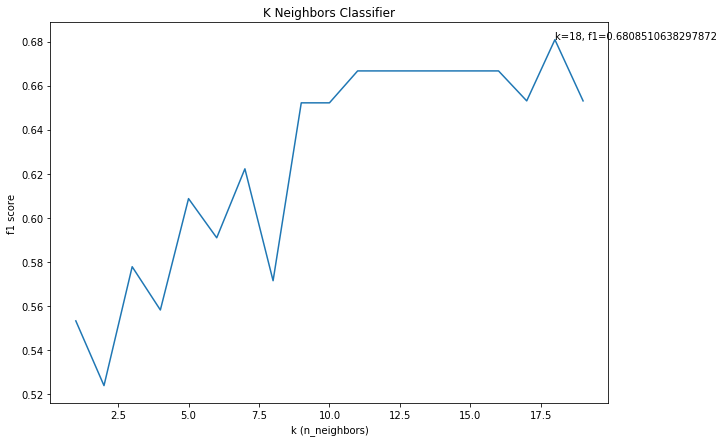

In [14]:
max_f1=0
k_opt=0
f1_scores = []
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data,train_labels)
    predicted_labels = knn.predict(test_data)
    f1 = metrics.f1_score(test_labels, predicted_labels)
    f1_scores.append(f1)
    if f1 > max_f1:
        max_f1 = f1
        k_opt = k

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(1,20), f1_scores)
plt.title('K Neighbors Classifier')
plt.xlabel('k (n_neighbors)')
plt.ylabel('f1 score')
ax.annotate('k={}, f1={}'.format(k_opt,max_f1), (k_opt, f1_scores[k_opt-1]))
plt.show()

In [8]:
knn = KNeighborsClassifier(n_neighbors = k_opt)
knn.fit(train_data,train_labels)
predicted_labels = knn.predict(test_data)
predicted_2021 = knn.predict(data_2021)

print("K Neighbors Classifier (k={})\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    k_opt,
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

K Neighbors Classifier (k=18)
accuracy_score=0.9672489082969432
precision=0.6956521739130435
recall=0.6666666666666666
f1_score=0.6808510638297872
confusion matrix
[[427   7]
 [  8  16]]


In [9]:
knn_results = test_data.merge(df)
knn_results.rename({'allstar':'actual'}, axis=1, inplace=True)
knn_results['predicted'] = predicted_labels
knn_results.sort_values(by='actual', ascending=False, inplace=True)
knn_results[(knn_results['actual']==1) |  (knn_results['predicted']==1)][['name','year','actual','predicted']].reset_index(drop=True)

,name,year,actual,predicted
0,Klay Thompson,2018,1,0
1,Donovan Mitchell,2019,1,1
2,Goran Dragić,2017,1,0
3,James Harden,2016,1,1
4,Trae Young,2019,1,1
5,Giannis Antetokounmpo,2018,1,1
6,Jaylen Brown,2020,1,1
7,Paul George,2018,1,1
8,Mike Conley,2020,1,0
9,Andre Drummond,2017,1,0


In [10]:
pred_2021 = data_2021.merge(d2021)
pred_2021['predicted'] = predicted_2021
pred_2021.sort_values(by='predicted', ascending=False, inplace=True)
pred_2021[pred_2021['predicted']==1][['name','predicted']].reset_index(drop=True)

,name,predicted
0,Kevin Durant,1
1,Devin Booker,1
2,Jayson Tatum,1
3,Trae Young,1
4,Donovan Mitchell,1
5,Giannis Antetokounmpo,1
6,Paul George,1
7,Ja Morant,1
8,Anthony Davis,1
9,Joel Embiid,1


### Random Forest Classifier - Non-Normalized

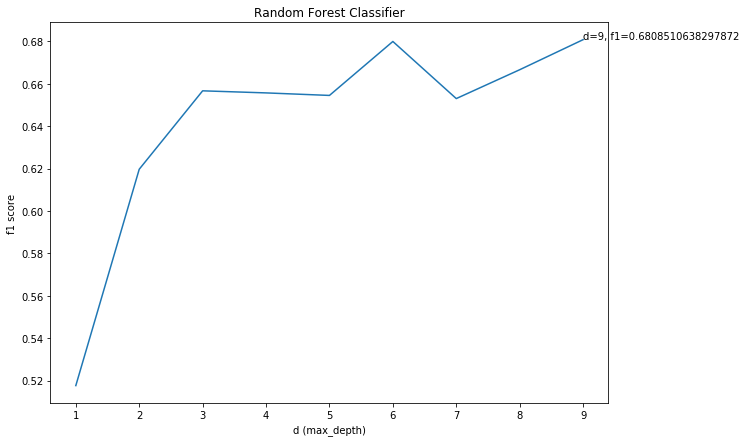

In [15]:
max_f1=0
d_opt=0
f1_scores = []
for d in range(1,10):
    model = RandomForestClassifier(class_weight="balanced_subsample", max_depth=d, n_estimators=100, random_state=42)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    f1 = metrics.f1_score(test_labels, predicted_labels)
    f1_scores.append(f1)
    if f1 > max_f1:
        max_f1 = f1
        d_opt = d

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.plot(range(1,10), f1_scores)
plt.title('Random Forest Classifier')
plt.xlabel('d (max_depth)')
plt.ylabel('f1 score')
ax1.annotate('d={}, f1={}'.format(d_opt,max_f1), (d_opt, f1_scores[d_opt-1]))
plt.show()

In [16]:
model = RandomForestClassifier(class_weight="balanced_subsample", max_depth=d_opt, n_estimators=100, random_state=42)
model.fit(train_data, train_labels)
predicted_labels = model.predict(test_data)
predicted_2021 = model.predict(data_2021)

print("Random Forest Classifier (d={})\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    d_opt,
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

Random Forest Classifier (d=9)
accuracy_score=0.9672489082969432
precision=0.6956521739130435
recall=0.6666666666666666
f1_score=0.6808510638297872
confusion matrix
[[427   7]
 [  8  16]]


In [17]:
rf_results = test_data.merge(df)
rf_results.rename({'allstar':'actual'}, axis=1, inplace=True)
rf_results['predicted'] = predicted_labels
rf_results.sort_values(by='actual', ascending=False, inplace=True)
rf_results[(rf_results['actual']==1) |  (rf_results['predicted']==1)][['name','year','actual','predicted']].reset_index(drop=True)

,name,year,actual,predicted
0,Klay Thompson,2018,1,0
1,Donovan Mitchell,2019,1,1
2,Goran Dragić,2017,1,0
3,James Harden,2016,1,1
4,Trae Young,2019,1,0
5,Giannis Antetokounmpo,2018,1,1
6,Jaylen Brown,2020,1,1
7,Paul George,2018,1,1
8,Mike Conley,2020,1,0
9,Andre Drummond,2017,1,0


In [18]:
pred_2021_rf = data_2021.merge(d2021)
pred_2021_rf['predicted'] = predicted_2021
pred_2021_rf.sort_values(by='predicted', ascending=False, inplace=True)
pred_2021_rf[pred_2021_rf['predicted']==1][['name','predicted']].reset_index(drop=True)

,name,predicted
0,Luka Dončić,1
1,Ja Morant,1
2,Paul George,1
3,Jaylen Brown,1
4,Kevin Durant,1
5,Bradley Beal,1
6,Devin Booker,1
7,Stephen Curry,1
8,Anthony Davis,1
9,Giannis Antetokounmpo,1


### Logistic Regression Classifier - Non-Normalized

In [19]:
model = LogisticRegression()
model.fit(train_data, train_labels)
predicted_labels = model.predict(test_data)
probabilities = model.predict_proba(test_data)
predicted_2021 = model.predict(data_2021)
probabilities_2021 = model.predict_proba(data_2021)

print("Logistic Regression Classifier\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

Logistic Regression Classifier
accuracy_score=0.9672489082969432
precision=0.7647058823529411
recall=0.5416666666666666
f1_score=0.6341463414634146
confusion matrix
[[430   4]
 [ 11  13]]


/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
results = test_data.merge(df)
results.rename({'allstar':'actual'}, axis=1, inplace=True)
results['predicted'] = predicted_labels
results['prob_as'] = probabilities[:,1]
results['prob_non'] = probabilities[:,0]
results.sort_values(by='prob_as', ascending=False, inplace=True)
results[(results['actual']==1) |  (results['predicted']==1)][['name','year','actual','prob_as','prob_non','predicted']].reset_index(drop=True)

,name,year,actual,prob_as,prob_non,predicted
0,Russell Westbrook,2016,1,0.998654,0.001346,1
1,Giannis Antetokounmpo,2018,1,0.996200,0.003800,1
2,James Harden,2016,1,0.993901,0.006099,1
3,Kevin Durant,2016,1,0.986933,0.013067,1
4,Luka Dončić,2019,1,0.986886,0.013114,1
5,LeBron James,2016,1,0.986138,0.013862,1
6,Kevin Durant,2017,1,0.978423,0.021577,1
7,Russell Westbrook,2020,0,0.965011,0.034989,1
8,Giannis Antetokounmpo,2017,1,0.934428,0.065572,1
9,Trae Young,2019,1,0.930983,0.069017,1


In [21]:
pred_2021 = data_2021.merge(d2021)
pred_2021['predicted'] = predicted_2021
pred_2021['prob_as'] = probabilities_2021[:,1]
pred_2021['prob_non'] = probabilities_2021[:,0]
pred_2021.sort_values(by='prob_as', ascending=False, inplace=True)
pred_2021[pred_2021['predicted']==1][['name','predicted', 'prob_as']].reset_index(drop=True)

,name,predicted,prob_as
0,Nikola Jokić,1,0.996528
1,Giannis Antetokounmpo,1,0.996321
2,Kevin Durant,1,0.995401
3,Stephen Curry,1,0.992830
4,Luka Dončić,1,0.948731
5,Joel Embiid,1,0.933463
6,Trae Young,1,0.917845
7,Ja Morant,1,0.881827
8,James Harden,1,0.881747
9,LeBron James,1,0.864427


In [22]:
coefs_df = pd.DataFrame({'feature':data_cols,'weight':model.coef_[0]})
coefs_df['weight_abs'] = coefs_df.weight.abs()
coefs_df.sort_values(by='weight_abs', ascending=False, inplace=True)
coefs_df.reset_index(inplace=True, drop=True)
coefs_df

,feature,weight,weight_abs
0,win%,2.423428,2.423428
1,FT%,-1.895922,1.895922
2,2P%,-1.519178,1.519178
3,eFG%,-1.480835,1.480835
4,3P%,-1.400711,1.400711
5,FG%,-1.284770,1.284770
6,GS%,1.064943,1.064943
7,PF,-0.668026,0.668026
8,PTS,0.650201,0.650201
9,ORB,-0.561942,0.561942


### Normalize Dataset

In [23]:
names = list(df['name'])
allstars = list(df['allstar'])
years = list(df['year'])
names_2021 = list(d2021['name'])
scaled_data = scale(data, axis=0)
scaled_names = pd.DataFrame(scaled_data)
scaled_names.columns = data_cols
scaled_names['name'] = names
scaled_names['actual'] = allstars
scaled_names['year'] = years
scaled_data_2021 = scale(data_2021, axis=0)
scaled_names_2021 = pd.DataFrame(scaled_data_2021)
scaled_names_2021.columns = data_cols
scaled_names_2021['name'] = names_2021
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size=0.2, random_state=42, stratify=labels)
test_data_df = pd.DataFrame(test_data)
test_data_df.columns = data_cols

# test_data_df.head()

### KNN Classifier - Normalized

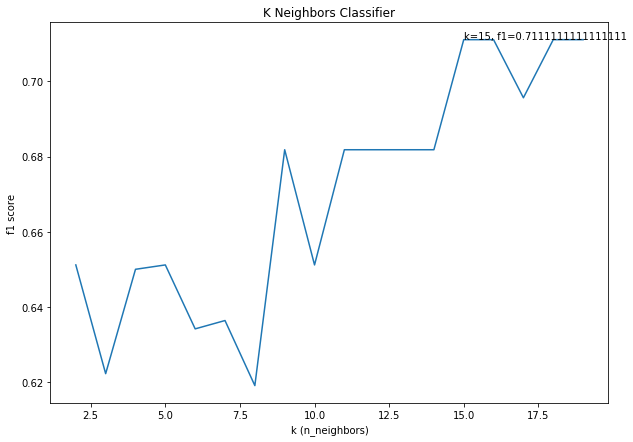

In [25]:
max_f1=0
k_opt=0
f1_scores = []
for k in range(2,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data,train_labels)
    predicted_labels = knn.predict(test_data)
    f1 = metrics.f1_score(test_labels, predicted_labels)
    f1_scores.append(f1)
    if f1 > max_f1:
        max_f1 = f1
        k_opt = k

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(range(2,20), f1_scores)
plt.title('K Neighbors Classifier')
plt.xlabel('k (n_neighbors)')
plt.ylabel('f1 score')
ax.annotate('k={}, f1={}'.format(k_opt,max_f1), (k_opt, f1_scores[k_opt-1]))
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors = k_opt)
knn.fit(train_data,train_labels)
predicted_labels = knn.predict(test_data)
predicted_2021 = knn.predict(scaled_data_2021)

print("K Neighbors Classifier (k={})\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    k_opt,
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

K Neighbors Classifier (k=15)
accuracy_score=0.9716157205240175
precision=0.7619047619047619
recall=0.6666666666666666
f1_score=0.7111111111111111
confusion matrix
[[429   5]
 [  8  16]]


In [27]:
knn_results = test_data_df.merge(scaled_names)
knn_results.rename({'allstar':'actual'}, axis=1, inplace=True)
knn_results['predicted'] = predicted_labels
knn_results.sort_values(by='actual', ascending=False, inplace=True)
knn_results[(knn_results['actual']==1) |  (knn_results['predicted']==1)][['name','year','actual','predicted']].reset_index(drop=True)

,name,year,actual,predicted
0,Klay Thompson,2018,1,0
1,Donovan Mitchell,2019,1,1
2,Goran Dragić,2017,1,0
3,James Harden,2016,1,1
4,Trae Young,2019,1,1
5,Giannis Antetokounmpo,2018,1,1
6,Jaylen Brown,2020,1,1
7,Paul George,2018,1,1
8,Mike Conley,2020,1,0
9,Andre Drummond,2017,1,0


In [28]:
pred_2021 = scaled_names_2021.copy()
pred_2021['predicted'] = predicted_2021
pred_2021.sort_values(by='predicted', ascending=False, inplace=True)
pred_2021[pred_2021['predicted']==1][['name','predicted']].reset_index(drop=True)

,name,predicted
0,LeBron James,1
1,Ja Morant,1
2,Jimmy Butler,1
3,Damian Lillard,1
4,Trae Young,1
5,Kevin Durant,1
6,James Harden,1
7,Giannis Antetokounmpo,1
8,Stephen Curry,1
9,Anthony Davis,1


### Random Forest Classifier - Normalized

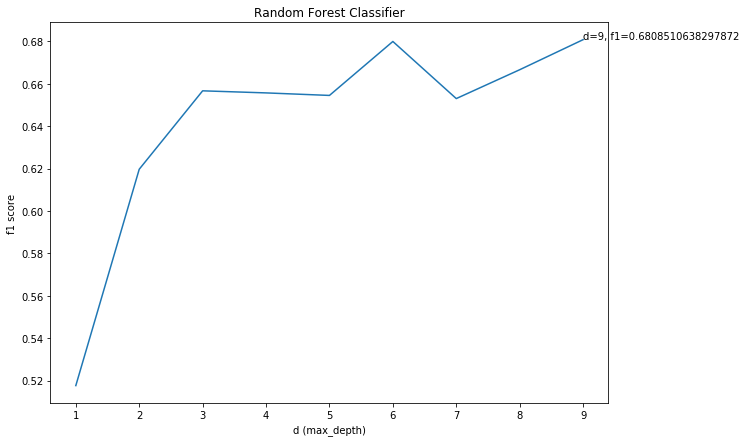

In [29]:
max_f1=0
d_opt=0
f1_scores = []
for d in range(1,10):
    model = RandomForestClassifier(class_weight="balanced_subsample", max_depth=d, n_estimators=100, random_state=42)
    model.fit(train_data, train_labels)
    predicted_labels = model.predict(test_data)
    f1 = metrics.f1_score(test_labels, predicted_labels)
    f1_scores.append(f1)
    if f1 > max_f1:
        max_f1 = f1
        d_opt = d

fig1, ax1 = plt.subplots(figsize=(10,7))
plt.plot(range(1,10), f1_scores)
plt.title('Random Forest Classifier')
plt.xlabel('d (max_depth)')
plt.ylabel('f1 score')
ax1.annotate('d={}, f1={}'.format(d_opt,max_f1), (d_opt, f1_scores[d_opt-1]))
plt.show()

In [30]:
model = RandomForestClassifier(class_weight="balanced_subsample", max_depth=d_opt, n_estimators=100, random_state=42)
model.fit(train_data, train_labels)
predicted_labels = model.predict(test_data)
predicted_2021 = model.predict(scaled_data_2021)

print("Random Forest Classifier (d={})\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    d_opt,
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

Random Forest Classifier (d=9)
accuracy_score=0.9672489082969432
precision=0.6956521739130435
recall=0.6666666666666666
f1_score=0.6808510638297872
confusion matrix
[[427   7]
 [  8  16]]


In [31]:
rf_results = test_data_df.merge(scaled_names)
rf_results.rename({'allstar':'actual'}, axis=1, inplace=True)
rf_results['predicted'] = predicted_labels
rf_results.sort_values(by='actual', ascending=False, inplace=True)
rf_results[(rf_results['actual']==1) |  (rf_results['predicted']==1)][['name','year','actual','predicted']].reset_index(drop=True)

,name,year,actual,predicted
0,Klay Thompson,2018,1,0
1,Donovan Mitchell,2019,1,1
2,Goran Dragić,2017,1,0
3,James Harden,2016,1,1
4,Trae Young,2019,1,0
5,Giannis Antetokounmpo,2018,1,1
6,Jaylen Brown,2020,1,1
7,Paul George,2018,1,1
8,Mike Conley,2020,1,0
9,Andre Drummond,2017,1,0


In [32]:
pred_2021_rf = scaled_names_2021.copy()
pred_2021_rf['predicted'] = predicted_2021
pred_2021_rf.sort_values(by='predicted', ascending=False, inplace=True)
pred_2021_rf[pred_2021_rf['predicted']==1][['name','predicted']].reset_index(drop=True)

,name,predicted
0,Luka Dončić,1
1,Ja Morant,1
2,Paul George,1
3,Jaylen Brown,1
4,Kevin Durant,1
5,Bradley Beal,1
6,Devin Booker,1
7,Stephen Curry,1
8,Anthony Davis,1
9,Giannis Antetokounmpo,1


### Logistic Regression Classifier - Normalized

In [33]:
model = LogisticRegression()
model.fit(train_data, train_labels)
predicted_labels = model.predict(test_data)
probabilities = model.predict_proba(test_data)
predicted_2021 = model.predict(scaled_data_2021)
probabilities_2021 = model.predict_proba(scaled_data_2021)

print("Logistic Regression Classifier\naccuracy_score={}\nprecision={}\nrecall={}\nf1_score={}\nconfusion matrix\n{}".format(
    metrics.accuracy_score(test_labels, predicted_labels),
    metrics.precision_score(test_labels, predicted_labels),
    metrics.recall_score(test_labels, predicted_labels),
    metrics.f1_score(test_labels, predicted_labels),
    metrics.confusion_matrix(test_labels, predicted_labels)
))

Logistic Regression Classifier
accuracy_score=0.9716157205240175
precision=0.7894736842105263
recall=0.625
f1_score=0.6976744186046512
confusion matrix
[[430   4]
 [  9  15]]


In [34]:
results = test_data_df.merge(scaled_names)
results.rename({'allstar':'actual'}, axis=1, inplace=True)
results['predicted'] = predicted_labels
results['prob_as'] = probabilities[:,1]
results['prob_non'] = probabilities[:,0]
results.sort_values(by='prob_as', ascending=False, inplace=True)
results[(results['actual']==1) |  (results['predicted']==1)][['name','year','actual','prob_as','prob_non','predicted']].reset_index(drop=True)


,name,year,actual,prob_as,prob_non,predicted
0,Russell Westbrook,2016,1,0.999659,0.000341,1
1,Giannis Antetokounmpo,2018,1,0.998966,0.001034,1
2,James Harden,2016,1,0.998927,0.001073,1
3,LeBron James,2016,1,0.998849,0.001151,1
4,Kevin Durant,2016,1,0.997083,0.002917,1
5,Kevin Durant,2017,1,0.992692,0.007308,1
6,Luka Dončić,2019,1,0.991790,0.008210,1
7,Russell Westbrook,2020,0,0.991608,0.008392,1
8,Paul George,2018,1,0.959714,0.040286,1
9,Giannis Antetokounmpo,2017,1,0.947542,0.052458,1


In [35]:
pred_2021 = scaled_names_2021.copy()
pred_2021['predicted'] = predicted_2021
pred_2021['prob_as'] = probabilities_2021[:,1]
pred_2021['prob_non'] = probabilities_2021[:,0]
pred_2021.sort_values(by='prob_as', ascending=False, inplace=True)
pred_2021[pred_2021['predicted']==1][['name','predicted', 'prob_as']].reset_index(drop=True)

,name,predicted,prob_as
0,Kevin Durant,1,0.998693
1,Giannis Antetokounmpo,1,0.997864
2,Nikola Jokić,1,0.995115
3,Stephen Curry,1,0.994930
4,LeBron James,1,0.988696
5,Luka Dončić,1,0.988139
6,Paul George,1,0.986489
7,James Harden,1,0.972350
8,Russell Westbrook,1,0.960830
9,Joel Embiid,1,0.950063


In [36]:
coefs_df = pd.DataFrame({'feature':data_cols,'weight':model.coef_[0]})
coefs_df['weight_abs'] = coefs_df.weight.abs()
coefs_df.sort_values(by='weight_abs', ascending=False, inplace=True)
coefs_df.reset_index(inplace=True, drop=True)
coefs_df

,feature,weight,weight_abs
0,win%,1.344794,1.344794
1,DRB,0.679081,0.679081
2,FG,0.644780,0.644780
3,PF,-0.584156,0.584156
4,Age,0.515681,0.515681
5,TRB,0.490720,0.490720
6,MP,0.482114,0.482114
7,PTS,0.476540,0.476540
8,AST,0.429448,0.429448
9,ORB,-0.411253,0.411253
